Setup
====

In [1]:
import seaborn
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import clusterrewire as cr
from clusterrewire import cluster_rewire_graph
import networkx as nx

Create the initial graph
===

In [6]:
n_nodes = 500
p = 1.5*log(n_nodes)/n_nodes
g = nx.erdos_renyi_graph(n=n_nodes, p=p)

try_count = 1
max_tries = 1000
while not nx.is_connected(g):
    g = nx.erdos_renyi_graph(n=n_nodes, p=p)
    try_count += 1
    if try_count>max_tries:
        print("Can't make a connected graph. Tried %i times."%max_tries)
        break

original_graph = g.copy()

print("Average degree: %.2f"%mean(list(g.degree().values())))

Average degree: 9.32


Cluster up
====

In [7]:
%%time
g = original_graph.copy()
A = nx.adjacency_matrix(g).todense()
find_best_A, (triangles_completed, triangles_possible) = cluster_rewire_graph(A, rewire_function=cr.one_move_find_best)
find_best_clustering = array(triangles_completed)/array(triangles_possible)

Attempting 2331 edge rewires, out of 2331 edges
Rewiring 0 out of 2331
Rewiring 10 out of 2331
Rewiring 20 out of 2331
Rewiring 30 out of 2331
Rewiring 40 out of 2331
Rewiring 50 out of 2331
Rewiring 60 out of 2331
Rewiring 70 out of 2331
Rewiring 80 out of 2331
Rewiring 90 out of 2331
Rewiring 100 out of 2331
Rewiring 110 out of 2331
Rewiring 120 out of 2331
Rewiring 130 out of 2331
Rewiring 140 out of 2331
Rewiring 150 out of 2331
Rewiring 160 out of 2331
Rewiring 170 out of 2331
Rewiring 180 out of 2331
Rewiring 190 out of 2331
Rewiring 200 out of 2331
Rewiring 210 out of 2331
Rewiring 220 out of 2331
Rewiring 230 out of 2331
Rewiring 240 out of 2331
Rewiring 250 out of 2331
Rewiring 260 out of 2331
Rewiring 270 out of 2331
Rewiring 280 out of 2331
Rewiring 290 out of 2331
Rewiring 300 out of 2331
Rewiring 310 out of 2331
Rewiring 320 out of 2331
Rewiring 330 out of 2331
Rewiring 340 out of 2331
Rewiring 350 out of 2331
Rewiring 360 out of 2331
Rewiring 370 out of 2331
Rewiring 380 

0.0

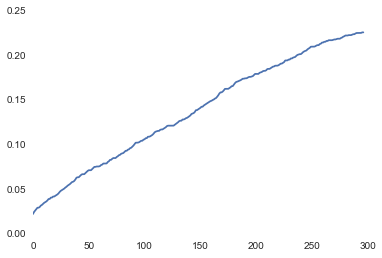

In [5]:
plot(find_best_clustering)
min(diff(find_best_clustering))

0.0

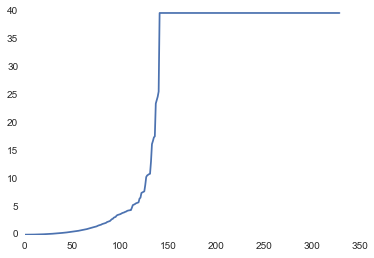

In [5]:
plot(find_best_clustering)
min(diff(find_best_clustering))

In [6]:
%%time
g = original_graph.copy()
A = nx.adjacency_matrix(g).todense()
find_best_A = cluster_rewire_graph(A, rewire_function=cr.one_move_find_best,
                                                                             property_functions=None)

Attempting 361 edge rewires, out of 361 edges
Rewiring 0 out of 361
Rewiring 10 out of 361
Rewiring 20 out of 361
Rewiring 30 out of 361
Rewiring 40 out of 361
Rewiring 50 out of 361
Rewiring 60 out of 361
Rewiring 70 out of 361
Rewiring 80 out of 361
Rewiring 90 out of 361
Rewiring 100 out of 361
Rewiring 110 out of 361
Rewiring 120 out of 361
Rewiring 130 out of 361
Rewiring 140 out of 361
Rewiring 150 out of 361
Rewiring 160 out of 361
Rewiring 170 out of 361
Rewiring 180 out of 361
Rewiring 190 out of 361
Rewiring 200 out of 361
Rewiring 210 out of 361
Rewiring 220 out of 361
Rewiring 230 out of 361
Rewiring 240 out of 361
Rewiring 250 out of 361
Rewiring 260 out of 361
Rewiring 270 out of 361
Couldn't make a move!
Rewired 76.7 percent of edges
CPU times: user 4.41 s, sys: 51.8 ms, total: 4.46 s
Wall time: 4.56 s


In [5]:
g = original_graph.copy()
A = nx.adjacency_matrix(g).todense()
improve_worst_A, (triangles_completed, triangles_possible) = cluster_rewire_graph(A, rewire_function=cr.one_move_improve_worst)
improve_worst_clustering = array(triangles_completed)/array(triangles_possible)

Attempting 333 edge rewires, out of 333 edges
Rewiring 0 out of 333
Rewiring 10 out of 333
Rewiring 20 out of 333
Rewiring 30 out of 333
Rewiring 40 out of 333
Rewiring 50 out of 333
Rewiring 60 out of 333
Rewiring 70 out of 333
Rewiring 80 out of 333
Rewiring 90 out of 333
Rewiring 100 out of 333
Rewiring 110 out of 333
Rewiring 120 out of 333
Rewiring 130 out of 333
Rewiring 140 out of 333
Rewiring 150 out of 333
Rewiring 160 out of 333
Rewiring 170 out of 333
Rewiring 180 out of 333
Rewiring 190 out of 333
Rewiring 200 out of 333
Rewiring 210 out of 333
Rewiring 220 out of 333
Rewiring 230 out of 333
Rewiring 240 out of 333
Rewiring 250 out of 333
Couldn't make a move!
Rewired 77.5 percent of edges


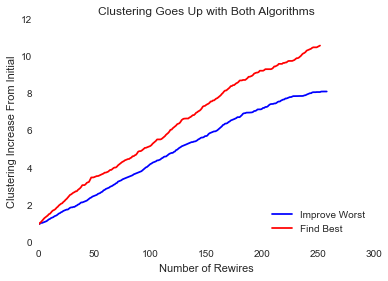

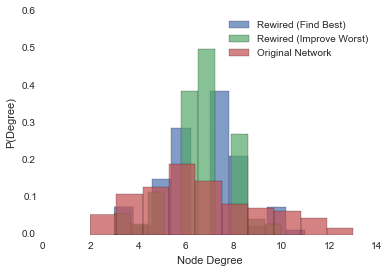

In [6]:
plot(improve_worst_clustering/improve_worst_clustering[0], color='b', label="Improve Worst")
plot(find_best_clustering/find_best_clustering[0], color='r', label="Find Best")
ylabel("Clustering Increase From Initial")
title("Clustering Goes Up with Both Algorithms")
xlabel("Number of Rewires")

legend(loc=4)

figure()
hist(sum(find_best_A,axis=1), alpha=.7, label='Rewired (Find Best)', normed=True)
hist(sum(improve_worst_A,axis=1), alpha=.7, label='Rewired (Improve Worst)', normed=True)
hist(sum(nx.adjacency_matrix(g).todense(),axis=1), alpha=.7, label='Original Network', normed=True)
ylabel("P(Degree)")
xlabel("Node Degree")
legend(loc=1)

Attempting 333 edge rewires, out of 333 edges
Rewiring 0 out of 333
Rewiring 10 out of 333
Rewiring 20 out of 333
Rewiring 30 out of 333
Rewiring 40 out of 333
Rewiring 50 out of 333
Rewiring 60 out of 333
Rewiring 70 out of 333
Rewiring 80 out of 333
Rewiring 90 out of 333
Rewiring 100 out of 333
Rewiring 110 out of 333
Rewiring 120 out of 333
Rewiring 130 out of 333
Rewiring 140 out of 333
Rewiring 150 out of 333
Rewiring 160 out of 333
Rewiring 170 out of 333
Rewiring 180 out of 333
Rewiring 190 out of 333
Rewiring 200 out of 333
Rewiring 210 out of 333
Rewiring 220 out of 333
Rewiring 230 out of 333
Rewiring 240 out of 333
Rewiring 250 out of 333
Rewiring 260 out of 333
Couldn't make a move!
Rewired 78.1 percent of edges
Attempting 333 edge rewires, out of 333 edges
Rewiring 0 out of 333
Rewiring 10 out of 333
Rewiring 20 out of 333
Rewiring 30 out of 333
Rewiring 40 out of 333
Rewiring 50 out of 333
Rewiring 60 out of 333
Rewiring 70 out of 333
Rewiring 80 out of 333
Rewiring 90 o

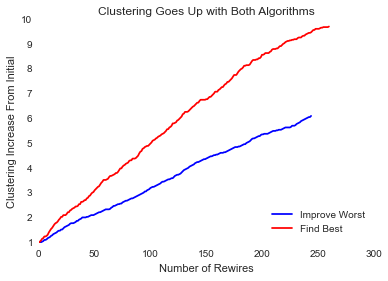

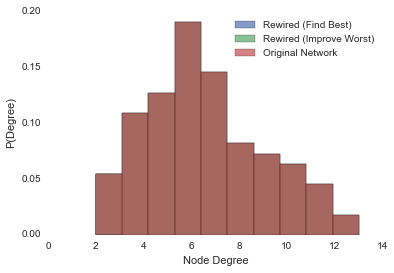

In [7]:
g = original_graph.copy()
A = nx.adjacency_matrix(g).todense()
find_best_A, (triangles_completed, triangles_possible) = cluster_rewire_graph(A, rewire_function=cr.one_move_find_best,
                                                                             preserve_degrees=True)
find_best_clustering = array(triangles_completed)/array(triangles_possible)

g = original_graph.copy()
A = nx.adjacency_matrix(g).todense()
improve_worst_A, (triangles_completed, triangles_possible) = cluster_rewire_graph(A, rewire_function=cr.one_move_improve_worst,
                                                                                 preserve_degrees=True)
improve_worst_clustering = array(triangles_completed)/array(triangles_possible)

plot(improve_worst_clustering/improve_worst_clustering[0], color='b', label="Improve Worst")
plot(find_best_clustering/find_best_clustering[0], color='r', label="Find Best")
ylabel("Clustering Increase From Initial")
title("Clustering Goes Up with Both Algorithms")
xlabel("Number of Rewires")

legend(loc=4)

figure()
hist(sum(find_best_A,axis=1), alpha=.7, label='Rewired (Find Best)', normed=True)
hist(sum(improve_worst_A,axis=1), alpha=.7, label='Rewired (Improve Worst)', normed=True)
hist(sum(nx.adjacency_matrix(g).todense(),axis=1), alpha=.7, label='Original Network', normed=True)
ylabel("P(Degree)")
xlabel("Node Degree")
legend(loc=1)

In [36]:
g = original_graph.copy()
A = nx.adjacency_matrix(g).todense()
find_best_A = cluster_rewire_graph(A, rewire_function=cr.one_move_find_best,
                                                                             preserve_degrees=True,
                                                                             property_functions=None)

g = original_graph.copy()
A = nx.adjacency_matrix(g).todense()
improve_worst_A = cluster_rewire_graph(A, rewire_function=cr.one_move_improve_worst,
                                                                                 preserve_degrees=True,
                                                                                 property_functions=None)
figure()
hist(sum(find_best_A,axis=1), alpha=.7, label='Rewired (Find Best)', normed=True)
hist(sum(improve_worst_A,axis=1), alpha=.7, label='Rewired (Improve Worst)', normed=True)
hist(sum(nx.adjacency_matrix(g).todense(),axis=1), alpha=.7, label='Original Network', normed=True)
ylabel("P(Degree)")
xlabel("Node Degree")
legend(loc=1)

Attempting 5231 edge rewires, out of 5231 edges
Rewiring 0 out of 5231
Rewiring 10 out of 5231
Rewiring 20 out of 5231
Rewiring 30 out of 5231
Rewiring 40 out of 5231
Rewiring 50 out of 5231
Rewiring 60 out of 5231
Rewiring 70 out of 5231
Rewiring 80 out of 5231
Rewiring 90 out of 5231
Rewiring 100 out of 5231
Rewiring 110 out of 5231
Rewiring 120 out of 5231
Rewiring 130 out of 5231
Rewiring 140 out of 5231
Rewiring 150 out of 5231
Rewiring 160 out of 5231
Rewiring 170 out of 5231
Rewiring 180 out of 5231
Rewiring 190 out of 5231
Rewiring 200 out of 5231
Rewiring 210 out of 5231
Rewiring 220 out of 5231
Rewiring 230 out of 5231
Rewiring 240 out of 5231
Rewiring 250 out of 5231
Rewiring 260 out of 5231
Rewiring 270 out of 5231
Rewiring 280 out of 5231
Rewiring 290 out of 5231
Rewiring 300 out of 5231
Rewiring 310 out of 5231
Rewiring 320 out of 5231
Rewiring 330 out of 5231
Rewiring 340 out of 5231
Rewiring 350 out of 5231
Rewiring 360 out of 5231
Rewiring 370 out of 5231
Rewiring 380 

KeyboardInterrupt: 

In [12]:
g = original_graph.copy()
A = nx.adjacency_matrix(g).todense()
find_best_A, (triangles_completed, triangles_possible) = cluster_rewire_graph(A, rewire_function=cr.one_move_find_best)
find_best_clustering = array(triangles_completed)/array(triangles_possible)

Attempting 326 edge rewires, out of 326 edges
Rewiring 0 out of 326
Rewiring 10 out of 326
Rewiring 20 out of 326
Rewiring 30 out of 326
Rewiring 40 out of 326
Rewiring 50 out of 326
Rewiring 60 out of 326
Rewiring 70 out of 326
Rewiring 80 out of 326
Rewiring 90 out of 326
Rewiring 100 out of 326
Rewiring 110 out of 326
Rewiring 120 out of 326
Rewiring 130 out of 326
Rewiring 140 out of 326
Rewiring 150 out of 326
Rewiring 160 out of 326
Rewiring 170 out of 326
Rewiring 180 out of 326
Rewiring 190 out of 326
Rewiring 200 out of 326
Rewiring 210 out of 326
Rewiring 220 out of 326
Rewiring 230 out of 326
Rewiring 240 out of 326
Rewiring 250 out of 326
Rewiring 260 out of 326
Couldn't make a move!
Rewired 80.7 percent of edges


0.0

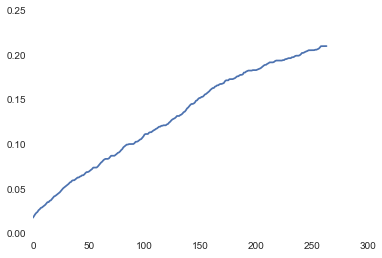

In [13]:
plot(array(triangles_completed)/array(triangles_possible))
min(diff(array(triangles_completed)/array(triangles_possible)))

In [28]:
def number_of_triangles_update(nt, A, A2, hinge, doorstop, latch):
    #return nt + A2[hinge, latch] - A2[hinge,doorstop] #This isn't working for some reason and I don't know why
#     return nt + A2[hinge, latch] - A2[hinge,doorstop] + A[latch, doorstop]
    return nt + A2[hinge, latch] - A2[hinge,doorstop] + A[latch, doorstop]

def number_of_possible_triangles_update(np, A, A2, hinge, doorstop, latch):
#     return np + sum(A[latch]) - sum(A[doorstop]) -1 #This isn't working for some reason and I don't know why
    return np + (sum(A[latch])-1) - sum(A[doorstop])#This isn't working for some reason and I don't know why

g = original_graph.copy()
A = nx.adjacency_matrix(g).todense()
find_best_A, (triangles_completed_test, triangles_possible_test) = cluster_rewire_graph(A, rewire_function=cr.one_move_find_best,
                                                                                        property_functions = [(cr.number_of_triangles, 
                                                                                                               number_of_triangles_update),
                                                                                                               (cr.number_of_possible_triangles,
                                                                                                                number_of_possible_triangles_update)])

Attempting 326 edge rewires, out of 326 edges
Rewiring 0 out of 326
Rewiring 10 out of 326
Rewiring 20 out of 326
Rewiring 30 out of 326
Rewiring 40 out of 326
Rewiring 50 out of 326
Rewiring 60 out of 326
Rewiring 70 out of 326
Rewiring 80 out of 326
Rewiring 90 out of 326
Rewiring 100 out of 326
Rewiring 110 out of 326
Rewiring 120 out of 326
Rewiring 130 out of 326
Rewiring 140 out of 326
Rewiring 150 out of 326
Rewiring 160 out of 326
Rewiring 170 out of 326
Rewiring 180 out of 326
Rewiring 190 out of 326
Rewiring 200 out of 326
Rewiring 210 out of 326
Rewiring 220 out of 326
Rewiring 230 out of 326
Rewiring 240 out of 326
Rewiring 250 out of 326
Rewiring 260 out of 326
Couldn't make a move!
Rewired 80.7 percent of edges


0.0

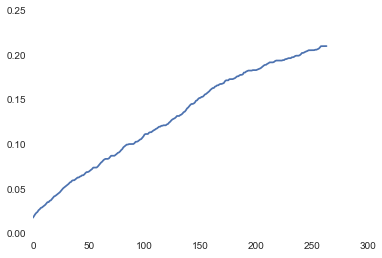

In [29]:
plot(array(triangles_completed_test)/array(triangles_possible_test))
min(diff(array(triangles_completed_test)/array(triangles_possible_test)))

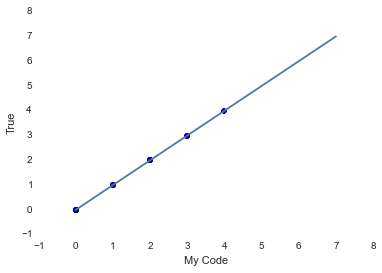

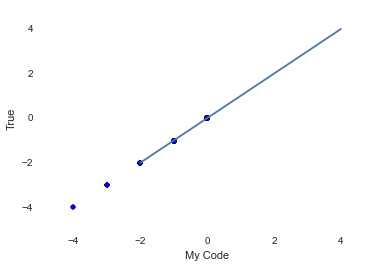

In [30]:
scatter(diff(triangles_completed),diff(triangles_completed_test))
plot((0,7),(0,7))
ylabel("True")
xlabel("My Code")
figure()
scatter(diff(triangles_possible),diff(triangles_possible_test))
ylabel("True")
xlabel("My Code")
plot((-2,4),(-2,4))
#plot(triangles_possible,triangles_possible_test)

In [20]:
%%time
g = original_graph.copy()
A = nx.adjacency_matrix(g).todense()
find_best_A, (triangles_completed_test, triangles_possible_test) = cluster_rewire_graph(A, rewire_function=cr.one_move_find_best,
                                                                                        property_functions = [(cr.number_of_triangles, 
                                                                                                               number_of_triangles_update),
                                                                                                               (cr.number_of_possible_triangles,
                                                                                                                number_of_possible_triangles_update)])

Attempting 326 edge rewires, out of 326 edges
Rewiring 0 out of 326
Rewiring 10 out of 326
Rewiring 20 out of 326
Rewiring 30 out of 326
Rewiring 40 out of 326
Rewiring 50 out of 326
Rewiring 60 out of 326
Rewiring 70 out of 326
Rewiring 80 out of 326
Rewiring 90 out of 326
Rewiring 100 out of 326
Rewiring 110 out of 326
Rewiring 120 out of 326
Rewiring 130 out of 326
Rewiring 140 out of 326
Rewiring 150 out of 326
Rewiring 160 out of 326
Rewiring 170 out of 326
Rewiring 180 out of 326
Rewiring 190 out of 326
Rewiring 200 out of 326
Rewiring 210 out of 326
Rewiring 220 out of 326
Rewiring 230 out of 326
Rewiring 240 out of 326
Rewiring 250 out of 326
Rewiring 260 out of 326
Couldn't make a move!
Rewired 80.7 percent of edges
CPU times: user 4.22 s, sys: 84.6 ms, total: 4.3 s
Wall time: 4.83 s


In [21]:
%%time
g = original_graph.copy()
A = nx.adjacency_matrix(g).todense()
find_best_A, (triangles_completed, triangles_possible) = cluster_rewire_graph(A, rewire_function=cr.one_move_find_best)

Attempting 326 edge rewires, out of 326 edges
Rewiring 0 out of 326
Rewiring 10 out of 326
Rewiring 20 out of 326
Rewiring 30 out of 326
Rewiring 40 out of 326
Rewiring 50 out of 326
Rewiring 60 out of 326
Rewiring 70 out of 326
Rewiring 80 out of 326
Rewiring 90 out of 326
Rewiring 100 out of 326
Rewiring 110 out of 326
Rewiring 120 out of 326
Rewiring 130 out of 326
Rewiring 140 out of 326
Rewiring 150 out of 326
Rewiring 160 out of 326
Rewiring 170 out of 326
Rewiring 180 out of 326
Rewiring 190 out of 326
Rewiring 200 out of 326
Rewiring 210 out of 326
Rewiring 220 out of 326
Rewiring 230 out of 326
Rewiring 240 out of 326
Rewiring 250 out of 326
Rewiring 260 out of 326
Couldn't make a move!
Rewired 80.7 percent of edges
CPU times: user 7.64 s, sys: 108 ms, total: 7.75 s
Wall time: 7.95 s
